In [3]:
import json 
import numpy as np
import pandas as pd
import random
import rich
with open("/home/wenkail/llm_personality/llm_bigfive/classifier/results/mse.json", 'r') as f:
    data = json.load(f)


In [4]:
big_five = ["o", "c", "e", "a", "n"]
df = pd.DataFrame(columns = big_five)

In [5]:
for i in range(len(big_five)):
    df[big_five[i]] = data['preds'][i]

In [6]:
df

,o,c,e,a,n
0,2,1,1,0,1
1,2,2,2,2,0
2,2,0,0,2,2
3,1,2,1,1,0
4,1,0,0,0,2
...,...,...,...,...,...
995,1,1,1,0,1
996,1,2,2,2,0
997,2,1,1,0,1
998,0,0,2,1,2


In [8]:
testset = "/data/user_data/wenkail/llm_personality/generator/data/alpaca_test_5_tokens_original.csv"
test_df = pd.read_csv(testset)
test_df.head()

    # Subsample the testset
num_samples = 1000
seed = 42
random.seed(seed)

sub_testset = test_df.sample(n=num_samples, random_state=seed)

In [20]:
# sub_testset = sub_testset.drop(columns=["message"])
sub_testset
sub_testset['word_count'] = sub_testset['message'].apply(lambda x: len(x.split()))
filtered_df = sub_testset[sub_testset['word_count'] > 5]
filtered_df = filtered_df.drop(columns=['word_count'])
sub_testset = filtered_df


In [21]:
len(alpaca_big_5_test)

998

In [11]:
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score


def calculate_metrics(y_true, y_pred):
    metrics = {
        'f1': f1_score(y_true, y_pred, average='macro'),
        'accuracy': accuracy_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred, average='macro'),
        'precision': precision_score(y_true, y_pred, average='macro')
    }
    return metrics


def compare_csv(df1, df2):

    results = {}
    average_metrics = {'f1': [], 'accuracy': [], 'recall': [], 'precision': []}

    for i in range(len(df1.columns)):
        y_true = df1.iloc[:, i]
        y_pred = df2.iloc[:, i]
        col_metrics = calculate_metrics(y_true, y_pred)
        results[f'Column {i}'] = col_metrics
        
        for key in average_metrics:
            average_metrics[key].append(col_metrics[key])

    for key in average_metrics:
        average_metrics[key] = sum(average_metrics[key]) / len(average_metrics[key])

    results['Average Metrics'] = average_metrics
    return results


comparison_results = compare_csv(df, sub_testset)
rich.print(comparison_results)


{
    'Column 0': {
        'f1': 0.3268034188034188,
        'accuracy': 0.33,
        'recall': 0.3300087317354525,
        'precision': 0.33067605895754865
    },
    'Column 1': {
        'f1': 0.32302888161509896,
        'accuracy': 0.325,
        'recall': 0.32412541361949243,
        'precision': 0.32439577006610787
    },
    'Column 2': {
        'f1': 0.35220456835098934,
        'accuracy': 0.354,
        'recall': 0.3528469399277327,
        'precision': 0.3543108450536874
    },
    'Column 3': {
        'f1': 0.33256101639500746,
        'accuracy': 0.34,
        'recall': 0.33536156360921615,
        'precision': 0.34062348707226375
    },
    'Column 4': {
        'f1': 0.3321739912987545,
        'accuracy': 0.333,
        'recall': 0.3323795439131863,
        'precision': 0.3323931623931624
    },
    'Average Metrics': {
        'f1': 0.3333543752926538,
        'accuracy': 0.3364,
        'recall': 0.334944438561016,
        'precision': 0.336479864708554
    }
}

### Dataset Cleaning

In [42]:
import json
import pandas as pd
import numpy as np
from tqdm import tqdm

In [29]:
datas = []
with open("generated_predictions_10000.jsonl", "r") as f:
    for line in f:
        data = json.loads(line)
        datas.append(data)

In [35]:
new_datas = []
for data in datas:
    if 'assistant\n\n' in data['prompt']: 
        new_datas.append(data)

In [46]:
data

{'prompt': 'user\n\nHelp me complete the sentence with certain Big Five Personality: Openness - median, Conscientiousness - low, Extraversion - median, Agreeableness - median, Neuroticism - median\nrelax n have fun nuhassistant\n\n',
 'label': 'yout ... nuh mind bad mind chuh fareall',
 'predict': 'fuck'}

In [36]:
len(new_datas)

9992

In [37]:
messages = []
for data in tqdm(new_datas):
    messages.append(data['prompt'].split('\n')[3] + " " + data['predict'])

100%|██████████| 9992/9992 [00:00<00:00, 1277845.09it/s]


In [51]:
df_messages = pd.DataFrame(messages, columns=['message'])

In [53]:
df_messages.to_csv("messages.csv")

In [38]:
messages

['afternoon beer and football. loveassistant it',
 'i\'m not much of aassistant bookworm, but i did enjoy reading a bit of "the history of the decline and fall of the roman empire" by edward gibbon.',
 'spent the entire day withassistant the love of my life',
 "i layed in bed lastassistant night and couldn't sleep for the life of me. i thought about everything from the past to the present and all i could think about was how much i hate my life and how i don't want to live anymore. i have no idea why i feel this way, but i just can't shake it.",
 "in the a.m.this has toassistant be the weirdest dream i've ever had...i was in a small room with my sister and my friend from college, jenn.",
 'oif &#151; 1st sgt.christopher d.assistant hodge, 33, of bakersfield, california, was killed in a non-combat vehicle accident on november 29, 2003, in kuwait.hodge was assigned to the 1st marine expeditionary force, i marine expeditionary force, camp pendleton, california.',
 "i don't think it isassis

In [47]:
import re
pattern = r"\b(Openness|Conscientiousness|Extraversion|Agreeableness|Neuroticism)\s*-\s*(low|median|high)"
mapping = {'low': 0, 'median': 1, 'high': 2}
results = []
for t in new_datas:
    results.append([mapping[match.group(2)] for match in re.finditer(pattern, t['prompt'])])
rs = np.array(results).T.tolist()

In [50]:
len(results)

9992

In [74]:
with open("rs.json", "w") as f:
    json.dump(rs, f, indent=4)

In [75]:
with open("pred.json", "w") as f:
    json.dump(pred, f, indent=4)

In [67]:
with open("messages.json", "r") as f:
    data = json.load(f)

In [68]:
pred = data
ope_g = rs[0]
con_g = rs[1]
ext_g = rs[2]
agr_g = rs[3]
neu_g = rs[4]
ope_p = pred['preds'][0]
con_p = pred['preds'][1]
ext_p = pred['preds'][2]
agr_p = pred['preds'][3]
neu_p = pred['preds'][4]

In [69]:
from evaluate import load
import numpy as np

def calculate_metrics(y_true, y_pred, average='macro'):
    accuracy_metric = load("accuracy")
    f1_metric = load("f1")
    precision_metric = load("precision")
    recall_metric = load("recall")

    accuracy = accuracy_metric.compute(references=y_true, predictions=y_pred)["accuracy"]
    f1 = f1_metric.compute(references=y_true, predictions=y_pred, average=average)["f1"]
    precision = precision_metric.compute(references=y_true, predictions=y_pred, average=average)["precision"]
    recall = recall_metric.compute(references=y_true, predictions=y_pred, average=average)["recall"]

    return accuracy, f1, precision, recall

/home/wenkail/miniconda3/envs/lp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [70]:
accuracies = []
f1s = []
precisions = []
recalls = []
accuracy, f1, precision, recall = calculate_metrics(ope_g, ope_p)
accuracies.append(accuracy)
f1s.append(f1)
precisions.append(precision)
recalls.append(recall)
accuracy, f1, precision, recall = calculate_metrics(con_g, con_p)
accuracies.append(accuracy)
f1s.append(f1)
precisions.append(precision)
recalls.append(recall)
accuracy, f1, precision, recall = calculate_metrics(ext_g, ext_p)
accuracies.append(accuracy)
f1s.append(f1)
precisions.append(precision)
recalls.append(recall)
accuracy, f1, precision, recall = calculate_metrics(agr_g, agr_p)
accuracies.append(accuracy)
f1s.append(f1)
precisions.append(precision)
recalls.append(recall)
accuracy, f1, precision, recall = calculate_metrics(neu_g, neu_p)
accuracies.append(accuracy)
f1s.append(f1)
precisions.append(precision)
recalls.append(recall)


/tmp/ipykernel_2639412/1674184911.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis')(np.linspace(0, 1, 5))


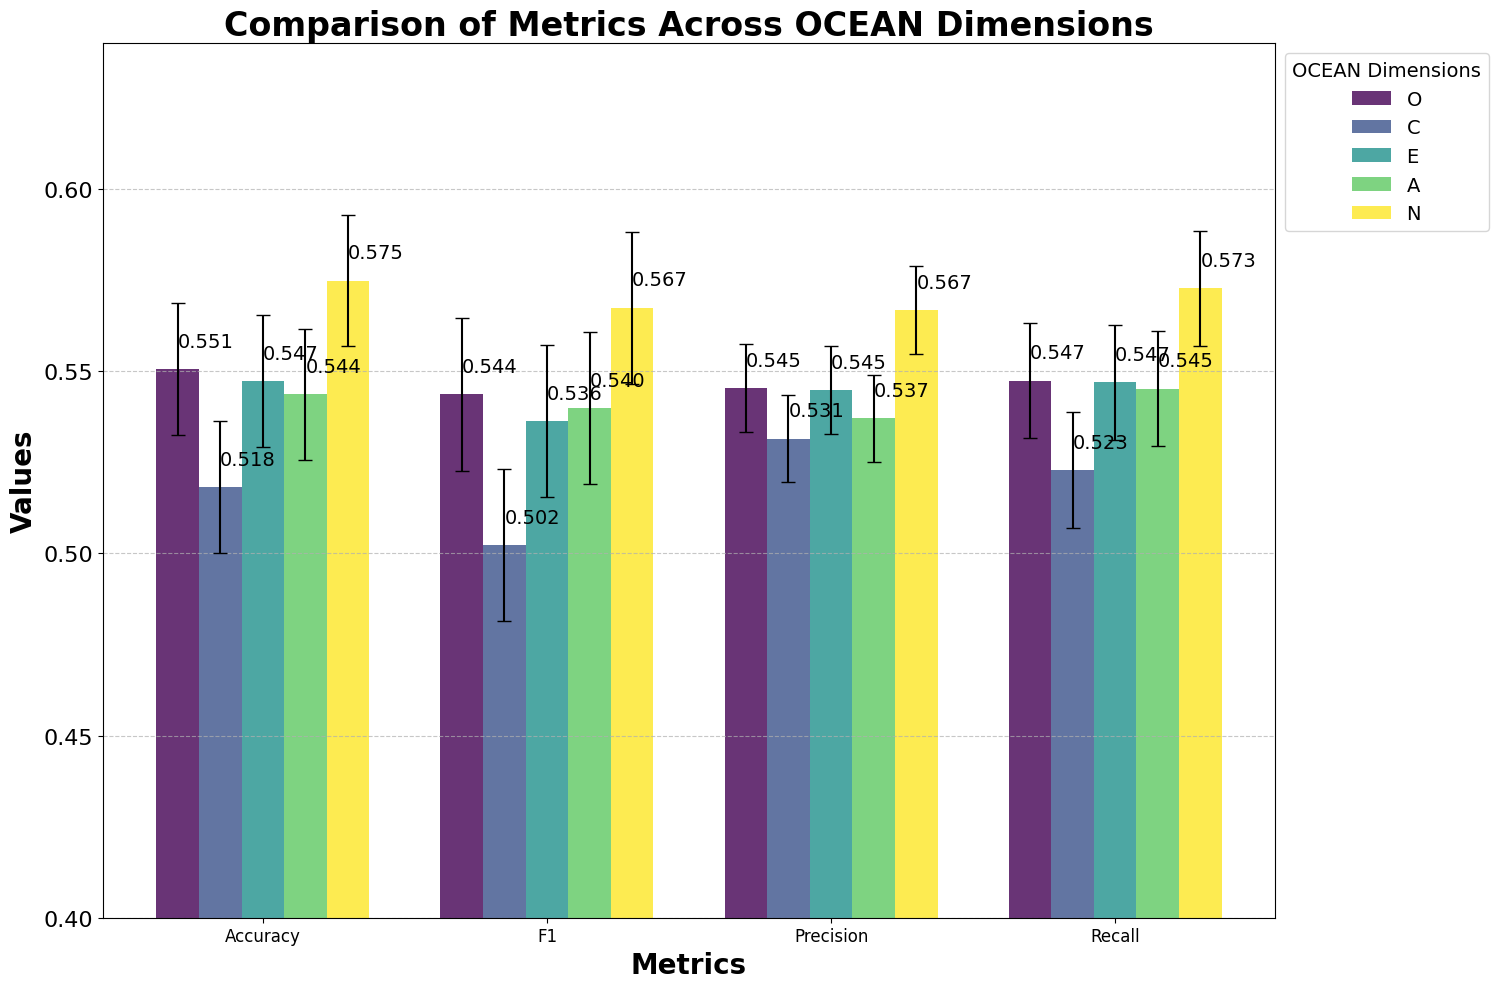

In [71]:
import matplotlib.pyplot as plt
import numpy as np


# 将所有数据组合到一个列表中
data = [accuracies, f1s, precisions, recalls]

# 定义metrics和维度
metrics = ['Accuracy', 'F1', 'Precision', 'Recall']
dimensions = ['O', 'C', 'E', 'A', 'N']

errors = [np.std(metric) for metric in data]
# Set up the plot
fig, ax = plt.subplots(figsize=(16, 10))

# Set bar width and positions
bar_width = 0.15
r = np.arange(len(metrics))

# Set colors
colors = plt.cm.get_cmap('viridis')(np.linspace(0, 1, 5))

# Plot bars with error bars
for i in range(len(dimensions)):
    ax.bar(r + i*bar_width, [d[i] for d in data], width=bar_width, label=dimensions[i], color=colors[i], alpha=0.8)
    ax.errorbar(r + i*bar_width, [d[i] for d in data], yerr=errors, fmt='none', ecolor='black', capsize=5)

# Customize the plot
ax.set_xlabel('Metrics', fontsize=20, fontweight='bold')
ax.set_ylabel('Values', fontsize=20, fontweight='bold')
ax.set_title('Comparison of Metrics Across OCEAN Dimensions', fontsize=24, fontweight='bold')
ax.set_xticks(r + bar_width*2)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(title='OCEAN Dimensions', title_fontsize='14', fontsize='14', loc='upper left', bbox_to_anchor=(1, 1))

# Set y-axis range
ax.set_ylim(0.40, 0.64)

# Add grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.yaxis.set_tick_params(labelsize=16)
# Add value labels on top of each bar
for i in range(len(metrics)):
    for j in range(len(dimensions)):
        ax.text(r[i] + j*bar_width, data[i][j] + 0.005, f'{data[i][j]:.3f}', 
                ha='left', va='bottom', fontsize=14, rotation=0)

# Add a text box with additional information
# info_text = "Note:\n• Error bars represent standard deviation\n• OCEAN: Openness, Conscientiousness, Extraversion, Agreeableness, Neuroticism\n• Values are simulated based on provided accuracy data"
ax.text(1.05, 0.05, None, transform=ax.transAxes, fontsize=20, verticalalignment='bottom', 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(right=0.8)  # Make room for the legend

# Show plot
plt.show()